In [3]:
#Importamos las librerias necesarias para el experimento
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt

#Importamos el dataset que vamos a utilizar para los experimento
from tensorflow.keras.datasets import cifar10

### Data set seleccionado

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 124s 1us/step


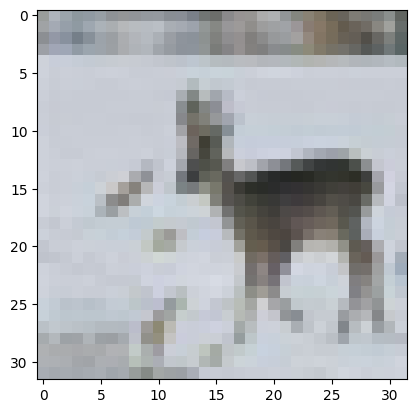

In [4]:
#Dividimos los datos donde X son los datos pertenecientes al dataset importado y Y son las etiquetas de entrenamiento
(xtrain, ytrain), (xtest, ytest) = cifar10.load_data()

#Se comprueba que se hizo la separación de forma correcta
plt.imshow(xtrain[20])
plt.show()


### Pre procesamiento de los datos

In [5]:
# Normalización de los datos
xtrain = xtrain.astype('float32') / 255
xtest = xtest.astype('float32') / 255

# Convirtiendo las etiquetas de las variables y_train y y_test a una representación one-hot encoding utilizando la biblioteca Keras de TensorFlow.
ytrain = tf.keras.utils.to_categorical(ytrain, num_classes=10)
ytest = tf.keras.utils.to_categorical(ytest, num_classes=10)


### Definición del Modelo CNN base

In [6]:
#Modelo base
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')
])


c:\Users\Aaron Urbina\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


### Compilación del modelo

In [7]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

### Experimento 1

In [8]:
#Entrenamiento del Modelo
history = model.fit(xtrain, ytrain, epochs=10, batch_size= 128, validation_data = (xtest, ytest))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - accuracy: 0.3555 - loss: 1.7939 - val_accuracy: 0.5279 - val_loss: 1.3494
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.5462 - loss: 1.2938 - val_accuracy: 0.5736 - val_loss: 1.2125
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.5926 - loss: 1.1629 - val_accuracy: 0.5951 - val_loss: 1.1567
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6294 - loss: 1.0673 - val_accuracy: 0.6101 - val_loss: 1.1144
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6392 - loss: 1.0290 - val_accuracy: 0.6231 - val_loss: 1.0859
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 14ms/step - accuracy: 0.6632 - loss: 0.9668 - val_accuracy: 0.6380 - val_loss: 1.0544
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6830 - loss: 0.9198 - val_accuracy: 0.6407 - val_loss: 1.0491
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 5s 13ms/step - accuracy: 0.6951 - loss: 0.8761 - val_accu

In [9]:
#Evaluación del modelo
test_loss, test_acc = model.evaluate(xtest, ytest)
print('Test accuracy:', test_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6574 - loss: 1.0166
Test accuracy: 0.6539000272750854


### Experimento 2

In [10]:
#Modificando el modelo agregando más capas convolucionales, aumentando el número de filtros y agregando una capa dropout
modelV2 = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    Dense(10, activation='softmax')
])

In [11]:
#Compilación del modelo modificado
modelV2.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

#Entrenamiento del modelo modificado
historyV2 = modelV2.fit(xtrain, ytrain, epochs=10, batch_size= 128, validation_data = (xtest, ytest))

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 9s 18ms/step - accuracy: 0.2589 - loss: 1.9737 - val_accuracy: 0.4913 - val_loss: 1.4180
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.4795 - loss: 1.4419 - val_accuracy: 0.5672 - val_loss: 1.2248
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5421 - loss: 1.2776 - val_accuracy: 0.5949 - val_loss: 1.1350
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.5881 - loss: 1.1717 - val_accuracy: 0.6219 - val_loss: 1.0755
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6145 - loss: 1.1003 - val_accuracy: 0.6511 - val_loss: 0.9909
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 17ms/step - accuracy: 0.6422 - loss: 1.0161 - val_accuracy: 0.6631 - val_loss: 0.9523
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 7s 18ms/step - accuracy: 0.6652 - loss: 0.9631 - val_accuracy: 0.6631 - val_loss: 0.9544
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 8s 19ms/step - accuracy: 0.6817 - loss: 0.9191 - val_accu

In [12]:
#Evaluar el modelo modificado
test_lossV2, test_accV2 = modelV2.evaluate(xtest, ytest)
print('Test accuracy (modelo modificado):', test_accV2)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.6829 - loss: 0.9049
Test accuracy (modelo modificado): 0.6776999831199646


Experimento 3

In [13]:
#Definición de los valores de los hiperparámetros a explorar

learning_rates = [0.0001, 0.001]
batch_sizes = [32, 128]
epochs = [5, 15]

best_acc = 0
best_params = None

for lr in learning_rates:
    for bsz in batch_sizes:
        for ep in epochs:
            model = Sequential([
                Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)),
                MaxPooling2D((2, 2)),
                Conv2D(64, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Conv2D(128, (3, 3), activation='relu'),
                MaxPooling2D((2, 2)),
                Flatten(),
                Dense(128, activation='relu'),
                tf.keras.layers.Dropout(0.5),
                Dense(10, activation='softmax')
                ])
            model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='categorical_crossentropy', metrics=['accuracy'])

            model.fit(xtrain, ytrain, epochs=ep, batch_size=bsz, validation_data=(xtest, ytest))

            test_loss, test_acc = model.evaluate(xtest, ytest)

            if test_acc > best_acc:
              best_acc = test_acc
              best_params = (lr,bsz,ep)



print("Mejor precisión: ", best_acc)
print("Mejores parametros; ", best_params)

Epoch 1/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.2231 - loss: 2.0905 - val_accuracy: 0.4130 - val_loss: 1.6531
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 10s 6ms/step - accuracy: 0.3941 - loss: 1.6606 - val_accuracy: 0.4615 - val_loss: 1.4900
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4428 - loss: 1.5260 - val_accuracy: 0.5146 - val_loss: 1.3691
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.4904 - loss: 1.4195 - val_accuracy: 0.5339 - val_loss: 1.3057
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.5119 - loss: 1.3618 - val_accuracy: 0.5458 - val_loss: 1.2570
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5494 - loss: 1.2567
Epoch 1/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - accuracy: 0.2136 - loss: 2.0949 - val_accuracy: 0.4232 - val_loss: 1.6166
Epoch 2/15
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.3851 - loss: 1.6631 - val_accuracy: 0.4811 - val_loss: 1.4489
Epoch 3/15
1563/1

In [14]:
#Evaluación del modelo con el mejor conjunto de parametros
print("Mejor precisión: ", best_acc)
print("Mejores parametros; ", best_params)

Mejor precisión:  0.7264000177383423
Mejores parametros;  (0.001, 128, 15)
